In [1]:
%run ./notebook_setup.py
import pandas as pd
import numpy as np
import librosa 
import librosa.display
import matplotlib.pyplot as plt
import seaborn as sns
import IPython.display as ipd
from config.config import RAW_DATA

In [2]:
RAVDESS = RAW_DATA / 'RAVDESS'

In [3]:
RAVDESS.exists()

True

In [4]:
audio_files = list(RAVDESS.rglob("*.wav"))
len(audio_files), audio_files[:5]

(2880,
 [PosixPath('/home/inventor/Speech Emotion Recognition/data/raw/RAVDESS/Actor_13/03-01-07-01-01-01-13.wav'),
  PosixPath('/home/inventor/Speech Emotion Recognition/data/raw/RAVDESS/Actor_13/03-01-02-01-02-01-13.wav'),
  PosixPath('/home/inventor/Speech Emotion Recognition/data/raw/RAVDESS/Actor_13/03-01-01-01-02-01-13.wav'),
  PosixPath('/home/inventor/Speech Emotion Recognition/data/raw/RAVDESS/Actor_13/03-01-05-01-01-01-13.wav'),
  PosixPath('/home/inventor/Speech Emotion Recognition/data/raw/RAVDESS/Actor_13/03-01-08-02-02-01-13.wav')])

In [5]:
file_path = audio_files[0]
file_path

PosixPath('/home/inventor/Speech Emotion Recognition/data/raw/RAVDESS/Actor_13/03-01-07-01-01-01-13.wav')

In [6]:
audio, sr = librosa.load(file_path, sr=None)

In [7]:
audio.shape, sr

((150550,), 48000)

In [8]:
# Info about audio file

print(f"Audio File dtype: {audio.dtype}")
print(f"Audio file Sampling Rate: {sr}")
print(f"Audio file shape: {audio.shape}")
print(f"Audio File duration(sec): {len(audio) / sr}")
print(f"Audio file amplitude range: {audio.min()} to {audio.max()}")

Audio File dtype: float32
Audio file Sampling Rate: 48000
Audio file shape: (150550,)
Audio File duration(sec): 3.136458333333333
Audio file amplitude range: -0.0311279296875 to 0.03192138671875


In [9]:
ipd.Audio(audio, rate=sr)

Text(0.5, 1.0, 'WaveForm of the Audio file')

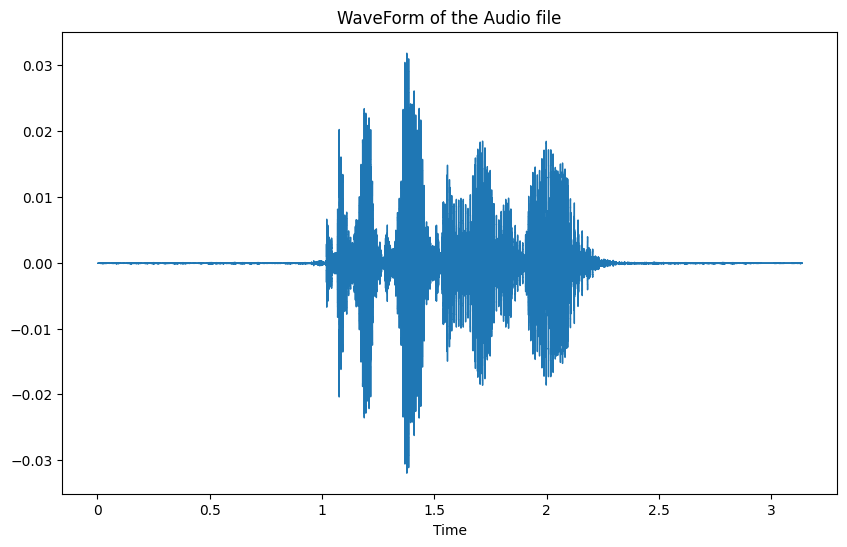

In [10]:
plt.figure(figsize=(10, 6))
librosa.display.waveshow(audio, sr=sr)
plt.title("WaveForm of the Audio file")

Text(0.5, 1.0, 'Spectrogram of the Audio file')

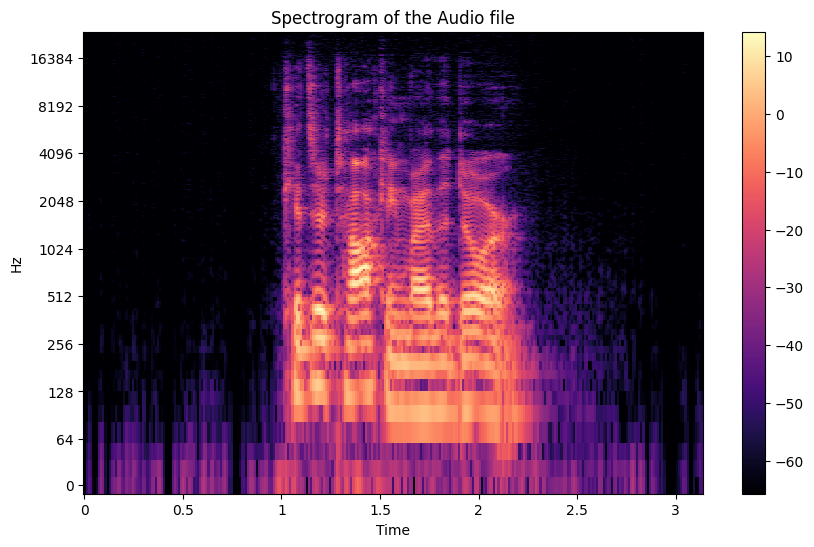

In [11]:
X = librosa.stft(audio)
Xdb = librosa.amplitude_to_db(abs(X))

plt.figure(figsize=(10, 6))
librosa.display.specshow(Xdb, sr=sr, x_axis="time", y_axis="log")
plt.colorbar()
plt.title("Spectrogram of the Audio file")

In [12]:
# Random File 
import random

random_file_path = random.choice(audio_files)

In [13]:
random_file_path

PosixPath('/home/inventor/Speech Emotion Recognition/data/raw/RAVDESS/audio_speech_actors_01-24/Actor_14/03-01-02-01-01-02-14.wav')

In [14]:
# See waveform the random file

audio_random, sr = librosa.load(random_file_path, sr=None)
audio_random, sr

(array([0., 0., 0., ..., 0., 0., 0.], shape=(171371,), dtype=float32), 48000)

Text(0.5, 1.0, 'Waveform of the Audio file')

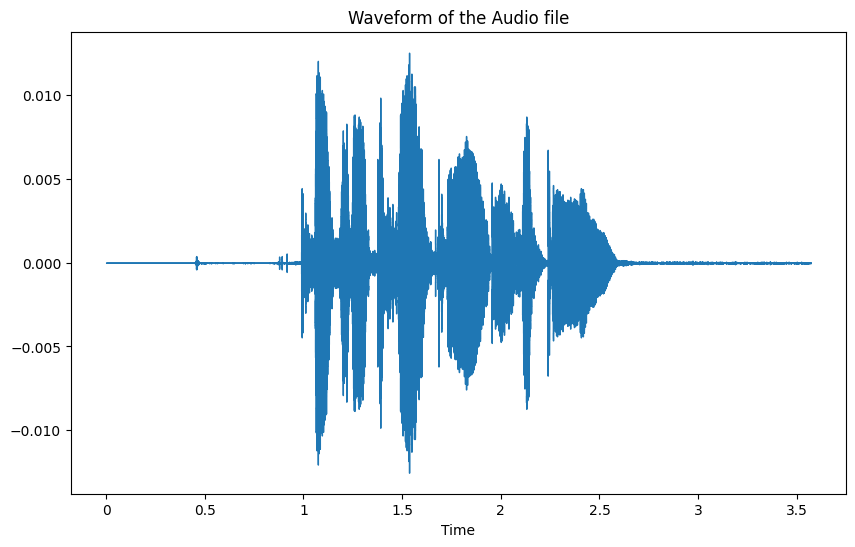

In [15]:
plt.figure(figsize=(10, 6))
librosa.display.waveshow(audio_random, sr=sr)
plt.title("Waveform of the Audio file")


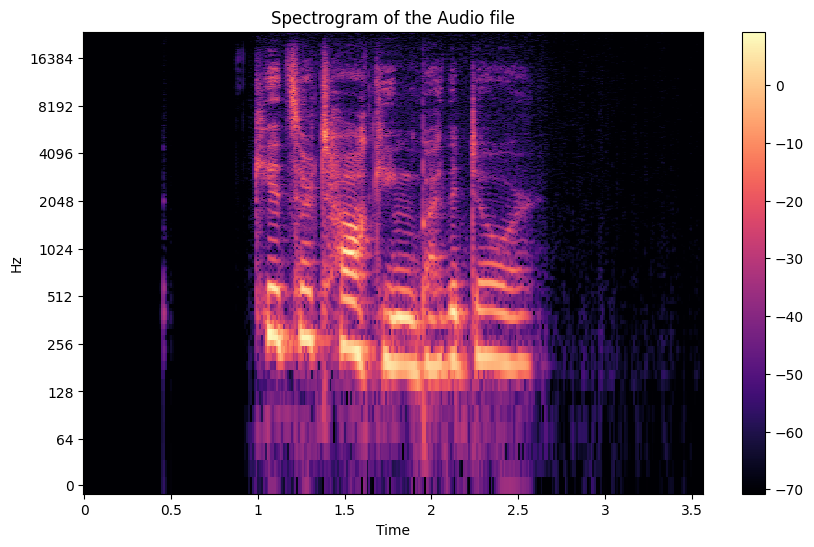

In [16]:
# Spectrogram of the random file
X_random = librosa.stft(audio_random)
Xdb = librosa.amplitude_to_db(abs(X_random))

plt.figure(figsize=(10, 6))
librosa.display.specshow(Xdb, sr=sr, x_axis="time", y_axis="log")
plt.title("Spectrogram of the Audio file")
plt.colorbar()


In [17]:
ipd.Audio(audio_random, rate=sr)

In [18]:
# Calculate the duration for all audio files in the dataset

durations = []

for file in audio_files:
    audio, sr = librosa.load(file, sr=None)
    durations.append(librosa.get_duration(y=audio, sr=sr))

Text(0, 0.5, 'Frequency')

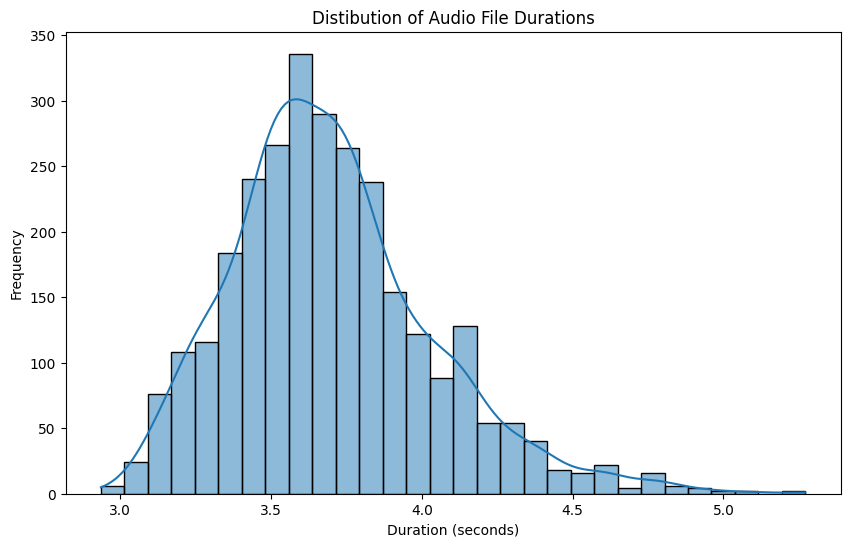

In [19]:
# Plot the histrogram for durations

plt.figure(figsize=(10, 6))
sns.histplot(durations, bins=30, kde=True)
plt.title("Distibution of Audio File Durations")
plt.xlabel("Duration (seconds)")
plt.ylabel("Frequency")

In [20]:
mfcc = librosa.feature.mfcc(y=audio, sr=sr, n_mfcc=13)
mfcc.shape

(13, 360)

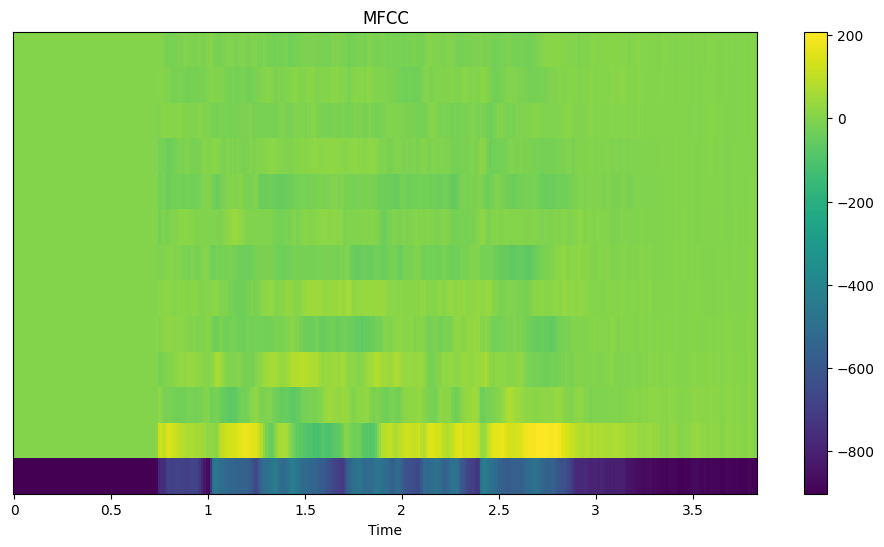

In [21]:
plt.figure(figsize=(12, 6))
librosa.display.specshow(mfcc, cmap="viridis", sr=sr, x_axis="time")
plt.title("MFCC")
plt.colorbar()

In [22]:
# Now Emotion label Distribtion in the RAVDESS dataset

emotion_labels = {
    '01': 'neutral',
    '02': 'calm',
    '03': 'happy',
    '04': 'sad',
    '05': 'angry',
    '06': 'fearful',
    '07': 'disgust',
    '08': 'surprised'
}

def get_emotion_label(file_path):
    parts = file_path.stem.split("-")
    emotion_part = parts[2]
    return emotion_labels[emotion_part]

In [23]:
# Get all emotion labels
emotion_labels_list = [get_emotion_label(file) for file in audio_files]

In [25]:
from collections import Counter

emotion_counts = Counter(emotion_labels_list)

In [27]:
emotion_counts

Counter({'disgust': 384,
         'calm': 384,
         'angry': 384,
         'surprised': 384,
         'happy': 384,
         'fearful': 384,
         'sad': 384,
         'neutral': 192})

In [31]:
emotion_counts.keys()

dict_keys(['disgust', 'calm', 'neutral', 'angry', 'surprised', 'happy', 'fearful', 'sad'])

Text(0, 0.5, 'Count')

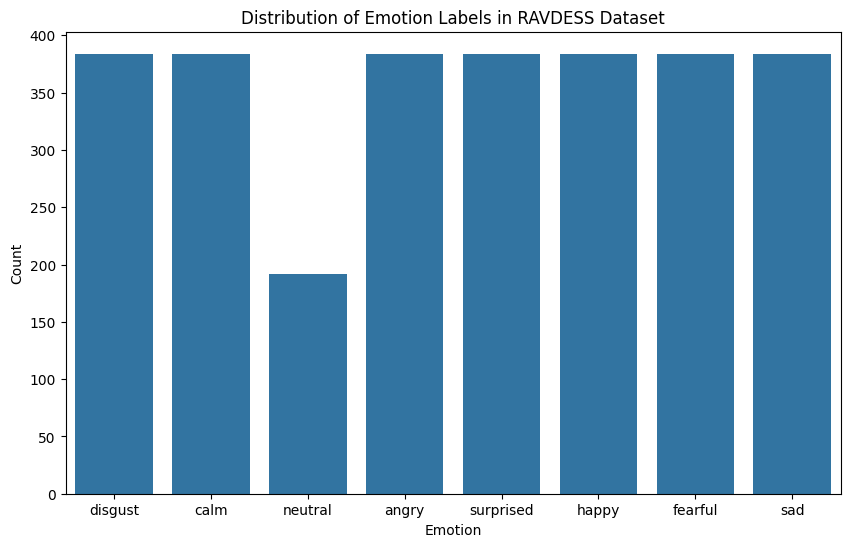

In [36]:
plt.figure(figsize=(10, 6))
sns.barplot(x=emotion_counts.keys(), y=emotion_counts.values())
plt.title("Distribution of Emotion Labels in RAVDESS Dataset")
plt.xlabel("Emotion")
plt.ylabel("Count")